<a href="https://colab.research.google.com/github/arssite/MachineLearning/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [4]:
id=pd.read_csv('insurance.csv')

In [5]:
id.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
id.shape

(1338, 7)

In [7]:
id.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
id.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
id['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [12]:
id['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
# prompt: generate who is smoker and female in sex

smoker_female = id[(id['sex'] == 'female') & (id['smoker'] == 'yes')]
print(smoker_female)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
23     34  female  31.920         1    yes  northeast  37701.87680
58     53  female  22.880         1    yes  southeast  23244.79020
64     20  female  22.420         0    yes  northwest  14711.74380
...   ...     ...     ...       ...    ...        ...          ...
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[115 rows x 7 columns]


In [19]:
# prompt: generate count who is smoker male and female

smoker_male = id[(id['sex'] == 'male') & (id['smoker'] == 'yes')]
smoker_female = id[(id['sex'] == 'female') & (id['smoker'] == 'yes')]

print("Number of male smokers:", smoker_male.shape[0])
print("Number of female smokers:", smoker_female.shape[0])


Number of male smokers: 159
Number of female smokers: 115


In [25]:
smoker_male = id[(id['sex'] == 'male') & (id['smoker'] == 'yes') & (id['age'] >=50)]
smoker_female = id[(id['sex'] == 'female') & (id['smoker'] == 'yes') & (id['age'] >=50) ]

print("Number of male smokers:", smoker_male.shape[0])
print("Number of female smokers:", smoker_female.shape[0])

Number of male smokers: 40
Number of female smokers: 28


<ipython-input-18-ddc20c780d7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(id['age'])


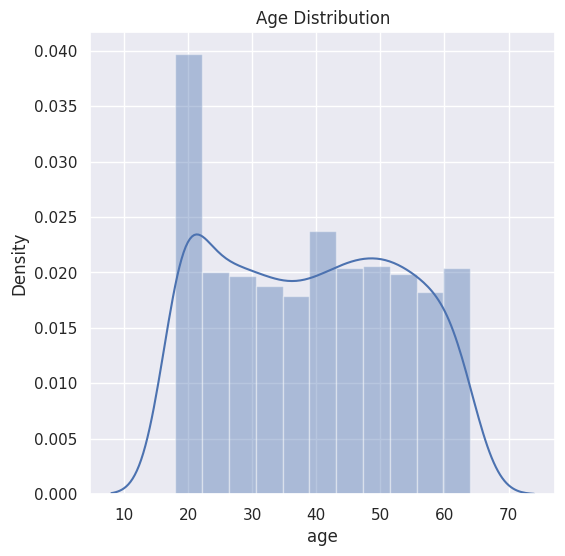

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(id['age'])
plt.title('Age Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

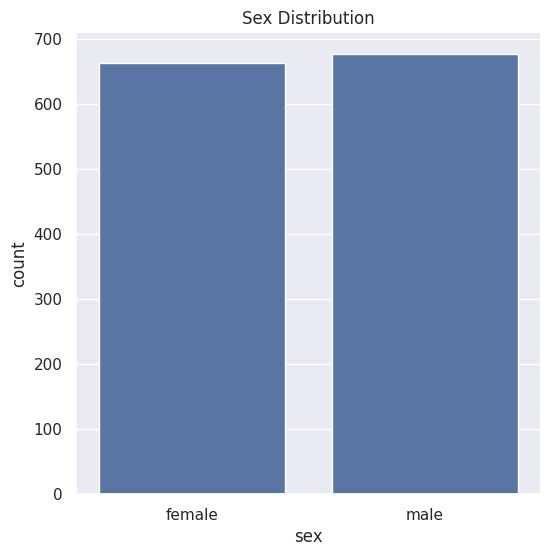

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=id)
plt.title('Sex Distribution')
plt.show

<ipython-input-21-f73183b6f756>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(id['bmi'])


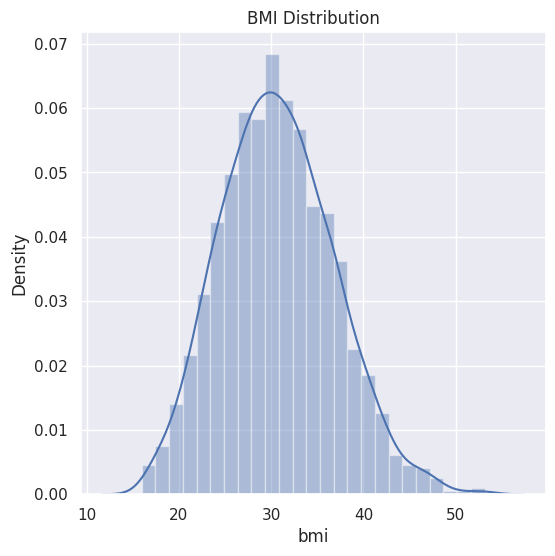

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(id['bmi'])
plt.title('BMI Distribution')
plt.show()

In [42]:
id.replace({'sex':{'male':0,'female':1}}, inplace=True)
id.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
id.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':4}},inplace=True)

In [43]:
id.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,4,21984.47061
4,32,0,28.880,0,1,4,3866.85520


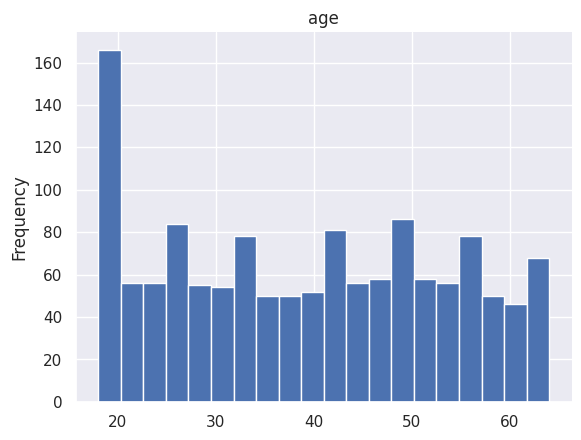

In [44]:
# @title age

from matplotlib import pyplot as plt
id['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [45]:
x=id.drop(columns='charges', axis=1)
y=id['charges']

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
print(id.shape,"\n",xtrain.shape,"\n",xtest.shape)

(1338, 7) 
 (1070, 6) 
 (268, 6)


In [47]:
model=LinearRegression()

In [48]:
model.fit(xtrain,ytrain)

LinearRegression()

In [49]:
model.score(xtrain,ytrain)

0.7514085919979442

In [55]:
trainacc=model.predict(xtrain)
trainaccuracy=metrics.r2_score(ytrain,trainacc)
trainaccuracy

0.7514085919979442

In [56]:
testaccu=model.predict(xtest)
testaccuracy=metrics.r2_score(ytest,testaccu)
testaccuracy

0.7443018651235678